In [2]:
%load_ext autoreload
%autoreload 2

from state import State
from domain import Domain
from swe_operators import SweLinearOperator, SweAdvectiveFormOperator, SweVecInvFormOperator
from time_schemes import rk4
from initial_conditions import gaussian_hill, barotropic_instability, geostrophic_balance
import operators as op
from vizualization import surf_field, imshow_field, animate_imshow, animate_surf

import numpy as np
%matplotlib notebook


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# definition of computational domain constants
RADZ = 6371.22 * 1000.0 # "Earth" radii in meters
GRAV = 9.80616 # "Earth" gravity acceleration in m * s**(-2)
OMEGA = 7.292 * 10**(-5) # "Earth" angular velocity in rad * s**(-1)
PCORI = 2 * OMEGA # Coriolis parameter
H_MEAN = 10 * 1000.0 # "Earth" mean atmosphere depth
C_GRAV = np.sqrt(GRAV * H_MEAN) # Gravity wave speed
LX = 2 * np.pi * RADZ # domain size [0, LX] x [0, LY]
LY = 2 * np.pi * RADZ # domain size [0, LX] x [0, LY]

# Тест разбегание Гауссовой горки без вращения

In [29]:
%%time
import time
from IPython.display import display, clear_output

domain = Domain(xs = 0.0, xe = LX, nx = 64, ys = 0.0, ye = LY, ny = 64)
state = gaussian_hill(domain, H_MEAN)
swe_operator = SweAdvectiveFormOperator(g = GRAV, pcori = 0.0, diff_method = op.central_diff2)

T = 5 * 3600 * 24.0
Nt = 1*180
dt = T / Nt

states_list = [state]
for k in range(Nt+1):
    clear_output(wait=True)
    display('Time step '+str(k))
    state = rk4(state, swe_operator, dt, domain)
    states_list.append(state)

'Time step 180'

CPU times: total: 2.23 s
Wall time: 2.23 s


<IPython.core.display.Javascript object>


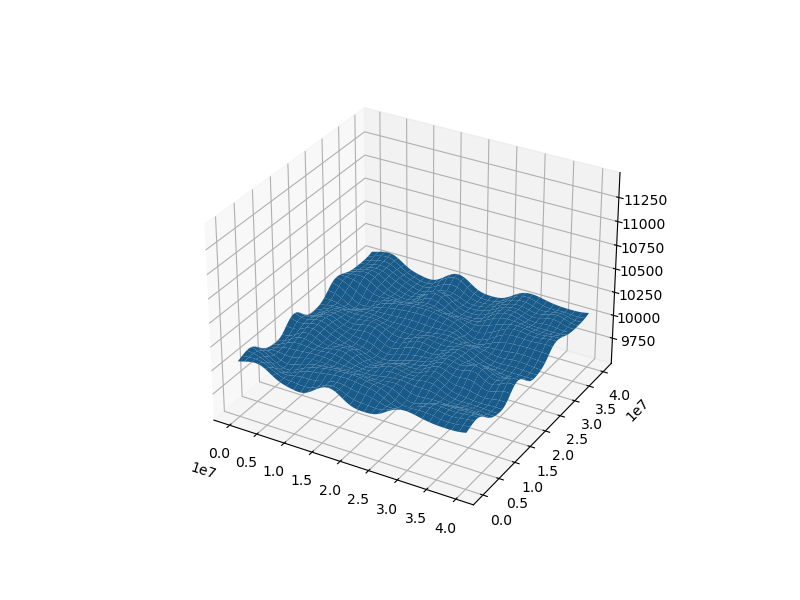

In [30]:
anim = animate_surf([state.h for state in states_list], domain, anim_speed=1)

# Тест разбегание Гауссовой горки c вращением

In [33]:
%%time
import time
from IPython.display import display, clear_output

domain = Domain(xs = 0.0, xe = LX, nx = 64, ys = 0.0, ye = LY, ny = 64)
state = gaussian_hill(domain, H_MEAN)
swe_operator = SweAdvectiveFormOperator(g = GRAV, pcori = PCORI, diff_method = op.central_diff2)

T = 5 * 3600 * 24.0
Nt = 1*180
dt = T / Nt

states_list = [state]
for k in range(Nt+1):
    clear_output(wait=True)
    display('Time step '+str(k))
    state = rk4(state, swe_operator, dt, domain)
    states_list.append(state)

'Time step 180'

CPU times: total: 2.94 s
Wall time: 3.06 s


<IPython.core.display.Javascript object>


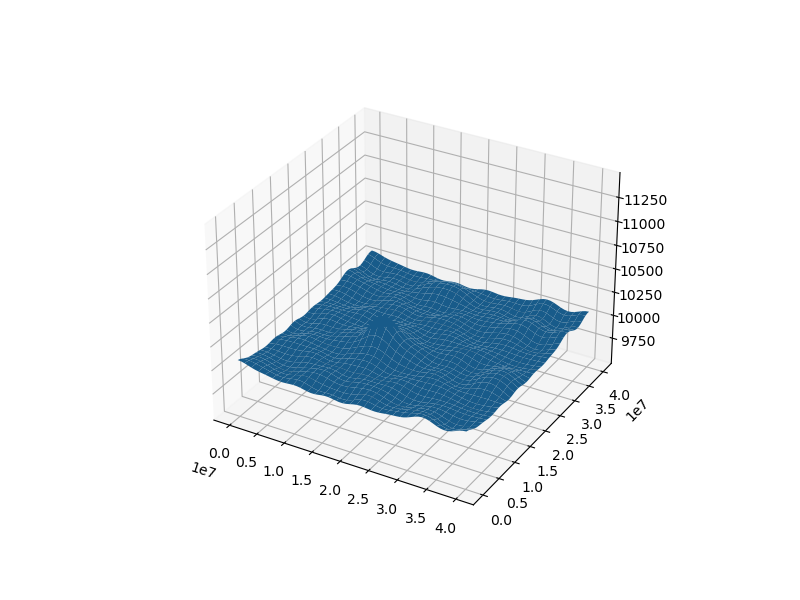

In [34]:
anim = animate_surf([state.h for state in states_list], domain, anim_speed=1)

# Тест баротропная неустойчивость

In [53]:
%%time
import time
from IPython.display import display, clear_output

domain = Domain(xs = 0.0, xe = LX, nx = 64, ys = 0.0, ye = LY, ny = 64)
#state = gaussian_hill(domain, H_MEAN)
state = barotropic_instability(domain, pcori=PCORI, g=GRAV, h_mean=H_MEAN)
swe_operator = SweAdvectiveFormOperator(g = GRAV, pcori = PCORI, diff_method = op.central_diff2)

T = 20 * 3600 * 24.0
Nt = 600
dt = T / Nt

states_list = [state]
for k in range(Nt+1):
    clear_output(wait=True)
    display('Time step '+str(k))
    state = rk4(state, swe_operator, dt, domain)
    states_list.append(state)

'Time step 600'

CPU times: total: 7.92 s
Wall time: 7.98 s


<IPython.core.display.Javascript object>


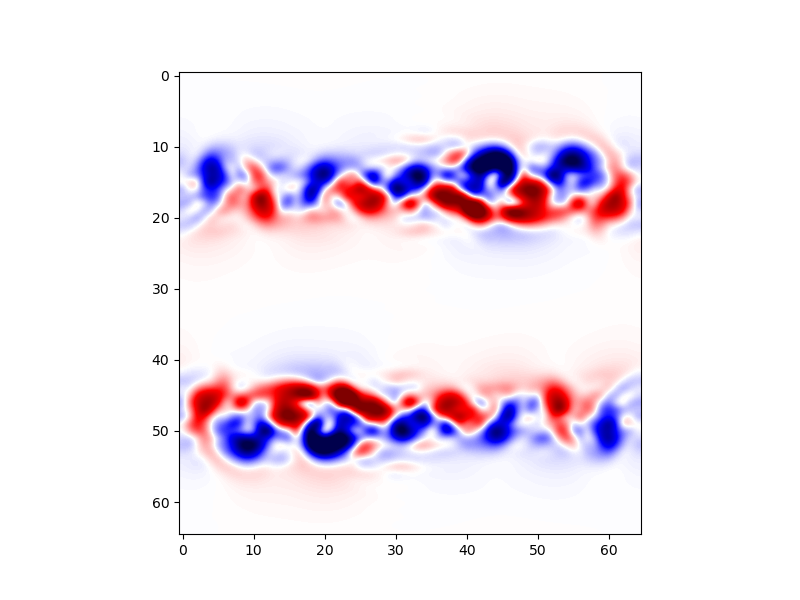

In [55]:
curl_list = [op.calc_curl(state.u, state.v, domain, op.central_diff2) for state in states_list]
anim = animate_imshow(curl_list, domain, anim_speed=2)

In [74]:
%%time
import time
from IPython.display import display, clear_output

domain = Domain(xs = 0.0, xe = LX, nx = 32, ys = 0.0, ye = LY, ny = 32)
state = geostrophic_balance(domain, pcori=PCORI, g=GRAV, h_mean=H_MEAN)
swe_operator = SweVecInvFormOperator(g = GRAV, pcori = PCORI, diff_method = op.central_diff2)

T = 5 * 3600 * 24.0
Nt = 150
dt = T / Nt

states_list = [state]
for k in range(Nt+1):
    clear_output(wait=True)
    display('Time step '+str(k))
    state = rk4(state, swe_operator, dt, domain)
    states_list.append(state)

'Time step 150'

CPU times: total: 1.19 s
Wall time: 1.08 s


<IPython.core.display.Javascript object>


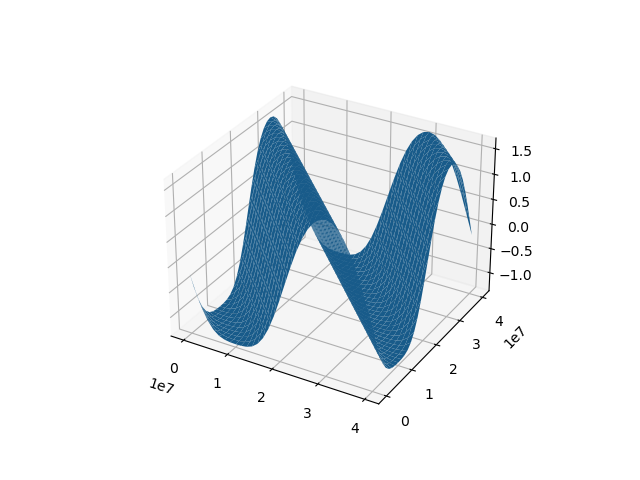

In [75]:
surf_field(states_list[2].h - states_list[0].h, domain)

<IPython.core.display.Javascript object>


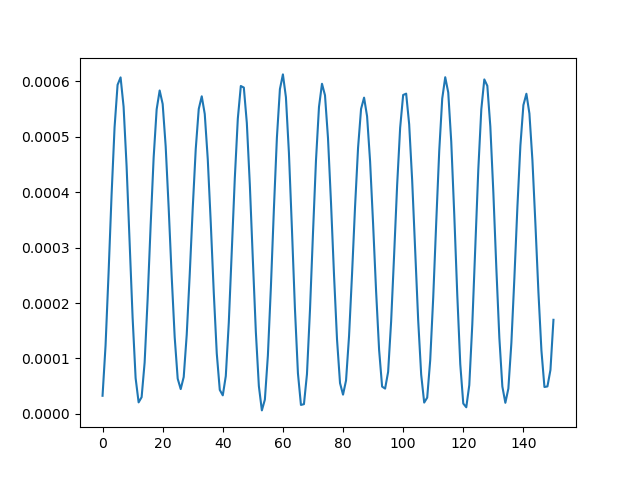

In [76]:
from vecmath import calc_c_norm, calc_l2_norm
import matplotlib.pyplot as plt

h_err_list = [state.h - states_list[0].h for state in states_list[1:]]
u_err_list = [state.u - states_list[0].u for state in states_list[1:]]
v_err_list = [state.v - states_list[0].v for state in states_list[1:]]
c_norm = [calc_c_norm(h, domain) / calc_c_norm(states_list[0].h, domain) for h in h_err_list]
l2_norm = [calc_l2_norm(h, domain) / calc_l2_norm(states_list[0].h, domain) for h in h_err_list]

fig, ax = plt.subplots()
ax.plot(c_norm)
plt.show()

<IPython.core.display.Javascript object>


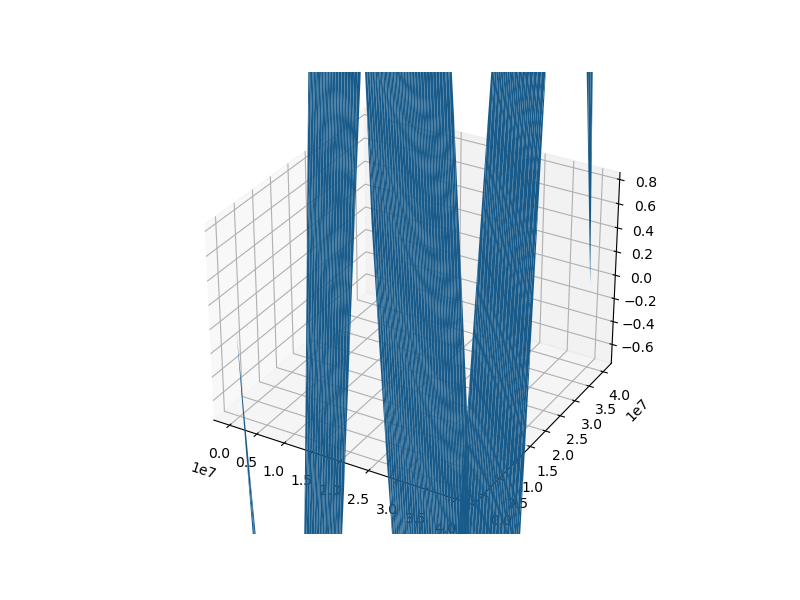

In [78]:
animate_surf(h_err_list, domain, 1)

<IPython.core.display.Javascript object>


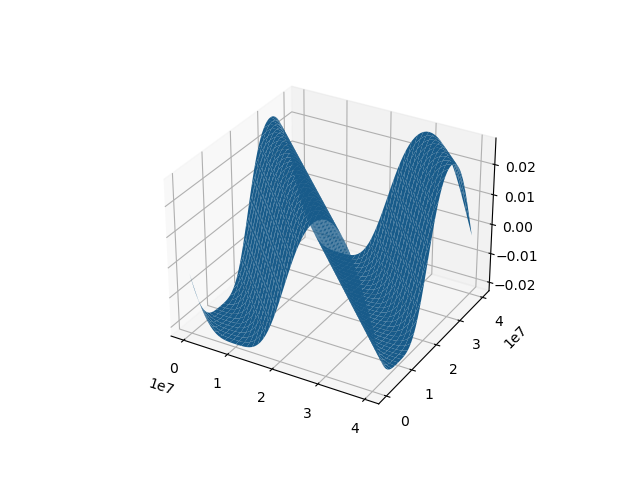

In [61]:
surf_field(h_list[0], domain)